In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

np.random.seed(42)

full_data = pd.read_csv('coffee_dataset.csv')
sample_data = full_data.sample(200)

sample_data.head()

,user_id,age,drinks_coffee,height
2402,2874,<21,True,64.357154
2864,3670,>=21,True,66.859636
2167,7441,<21,False,66.659561
507,2781,>=21,True,70.166241
1817,2875,>=21,True,71.369120


In [3]:
mu_C = sample_data.query("drinks_coffee == True")['height'].mean()
mu_C

68.11962990858618

In [4]:
mu_nC = sample_data.query("drinks_coffee == False")['height'].mean()
mu_nC

66.78492279927877

`1.` If you were interested in studying whether the average height for coffee drinkers is the same as for non-coffee drinkers, what would the null and alternative hypotheses be?  Write them in the cell below, and use your answer to answer the first quiz question below.

$$H_0: \mu_C = \mu_{\overline{C}} \\
H_1: \mu_C \neq \mu_{\overline{C}}$$

`2.` If you were interested in studying whether the average height for coffee drinkers is less than non-coffee drinkers, what would the null and alternative hypotheses be?  Write them in the cell below, and use your answer to answer the second quiz question below.

$$H_0: \mu_C \geq \mu_{\overline{C}} \\
H_1: \mu_C < \mu_{\overline{C}}$$

`3.` For 10,000 iterations: bootstrap the sample data, calculate the mean height for coffee drinkers and non-coffee drinkers, and calculate the difference in means for each sample.  You will want to have three arrays at the end of the iterations - one for each mean and one for the difference in means.  Use the results of your sampling distribution, to answer the third quiz question below.

In [5]:
heigth_coffee = []
heigth_non_coffee = []

index = sample_data.index
for _ in range(10000):
    bootstrapped_index = np.random.choice(index, size=200)
    heigth_coffee.append(sample_data.loc[bootstrapped_index].query("drinks_coffee == True")['height'].mean())
    heigth_non_coffee.append(sample_data.loc[bootstrapped_index].query("drinks_coffee == False")['height'].mean())

heigth_diff_coffee = np.array(heigth_coffee) - np.array(heigth_non_coffee)
heigth_diff_coffee

array([1.97329648, 2.03770736, 1.65413988, ..., 0.75580117, 0.60960309,
       1.79640607])

In [7]:
np.std(heigth_non_coffee)

0.40512631277475264

In [8]:
np.std(heigth_coffee)

0.24073763373473

In [9]:
np.std(heigth_diff_coffee)

0.4698091074387146

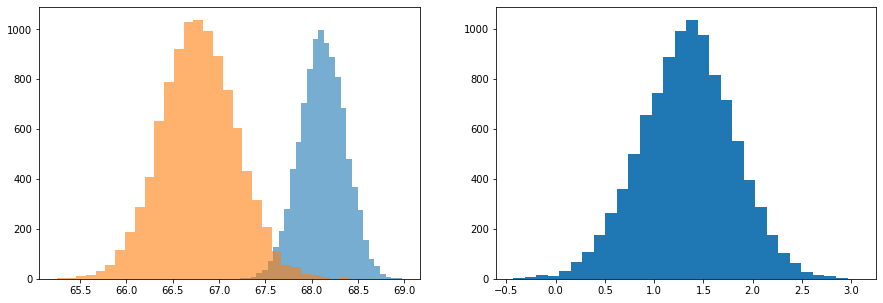

In [14]:
_, ax = plt.subplots(1, 2, figsize=(15,5))

ax[0].hist(heigth_coffee, 30, alpha=.6);
ax[0].hist(heigth_non_coffee, 30, alpha=.6);
ax[1].hist(heigth_diff_coffee, 30);

`4.` Now, use your observed sampling distribution for the difference in means and [the docs](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.random.normal.html) to simulate what you would expect the sampling distribution to be if the null hypothesis is true. You can do this be recentering your distribution at zero. Also, calculate the observed sample mean difference in `sample_data`. Use your solutions to answer the last questions in the quiz below.

In [10]:

means = []
for _ in range(10000):
    bootstrap = sample_data.sample(200, replace=True)
    means.append(bootstrap.height.mean())
std = np.std(means)


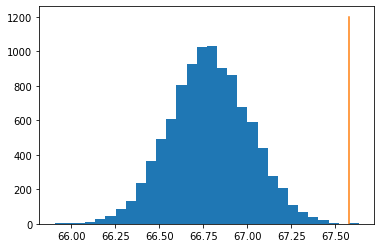

In [11]:
# Sample a bootstrap of values, which would be the last possible null hypothosis.
null_vals = np.random.normal(mu_nC, std, 10000)

plt.hist(null_vals, 30);
m = sample_data.height.mean()
plt.plot([m, m], [0, 1200]);

Die gelbe Linie ist die durchschnittliche Größe aller und die blaue Verteilung ist die Größe der nicht Kaffee-Trinker.

* Somit ist die Wahrscheinlichkeit, dass die echte Verteilung aus den nicht Kaffee-Trinkern entstehen könnte sehr klein, weil sehr weit außen.